In [1]:
# importar bibliotecas 

import tensorflow  as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tf.__version__

C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1

'2.3.0'

In [2]:
bicicletas = pd.read_csv('bike-sharing-daily.csv')

In [3]:
bicicletas

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [4]:
bicicletas.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.518261,0.089565,88,1518,1606
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.498696,0.168726,148,1362,1510
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.535833,0.266804,68,891,959
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.434167,0.361950,54,768,822
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.482917,0.223267,41,1280,1321


In [6]:
bicicletas.tail(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.577500,0.154846,439,2290,2729


In [8]:
bicicletas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [10]:
bicicletas.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


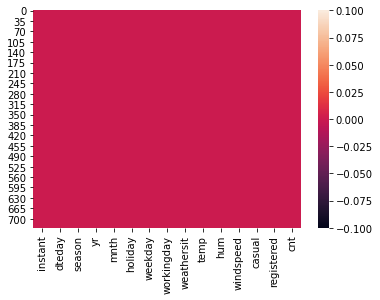

In [11]:
sns.heatmap(bicicletas.isnull())

In [13]:
bicicletas

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [14]:
# dropando coluna instant axis=1
bicicletas = bicicletas.drop(labels=['instant'], axis=1)

In [15]:
bicicletas

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [16]:
# nosso target é o cnt que é a soma de casual e registered
# então precisamos apenas do cnt 
bicicletas = bicicletas.drop(labels=['casual', 'registered'], axis=1)

In [19]:
bicicletas

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [20]:
# %m/%d/%Y significa mes/dia/ano
# você pode economizar tempo usando recurso
bicicletas.dteday = pd.to_datetime(bicicletas.dteday, format='%m/%d/%Y')

In [22]:
bicicletas

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [23]:
bicicletas.index = pd.DatetimeIndex(bicicletas.dteday)

In [24]:
bicicletas

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
2012-12-28,2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
2012-12-29,2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341


In [25]:
bicicletas = bicicletas.drop(labels=['dteday'], axis=1)

In [26]:
bicicletas

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341


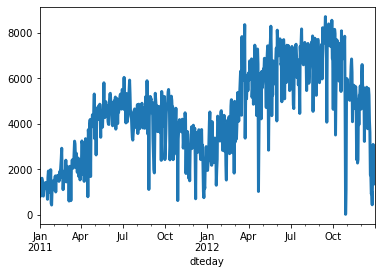

In [30]:
bicicletas['cnt'].plot(linewidth=3)

Text(0, 0.5, 'Aluguel de bicicleta')

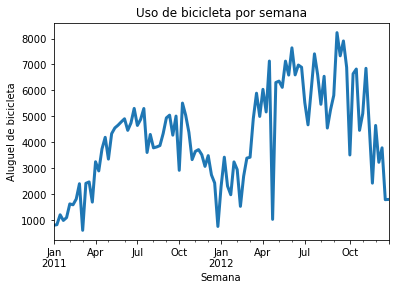

In [36]:
# agrupa por semana asfreq('W')
bicicletas['cnt'].asfreq('W').plot(linewidth=3)
plt.title('Uso de bicicleta por semana')
plt.xlabel('Semana')
plt.ylabel('Aluguel de bicicleta')


Text(0, 0.5, 'Aluguel de bicicleta')

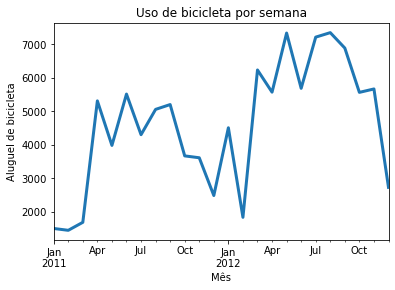

In [37]:
# agrupa por mês asfreq('M')
bicicletas['cnt'].asfreq('M').plot(linewidth=3)
plt.title('Uso de bicicleta por semana')
plt.xlabel('Mês')
plt.ylabel('Aluguel de bicicleta')

Text(0, 0.5, 'Aluguel de bicicleta')

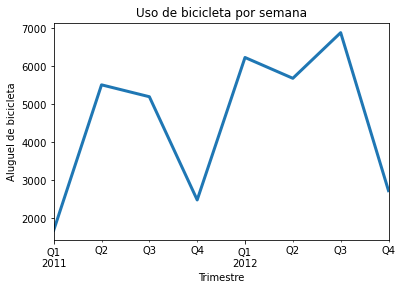

In [38]:
# agrupa por trimestre asfreq('Q')
bicicletas['cnt'].asfreq('Q').plot(linewidth=3)
plt.title('Uso de bicicleta por semana')
plt.xlabel('Trimestre')
plt.ylabel('Aluguel de bicicleta')

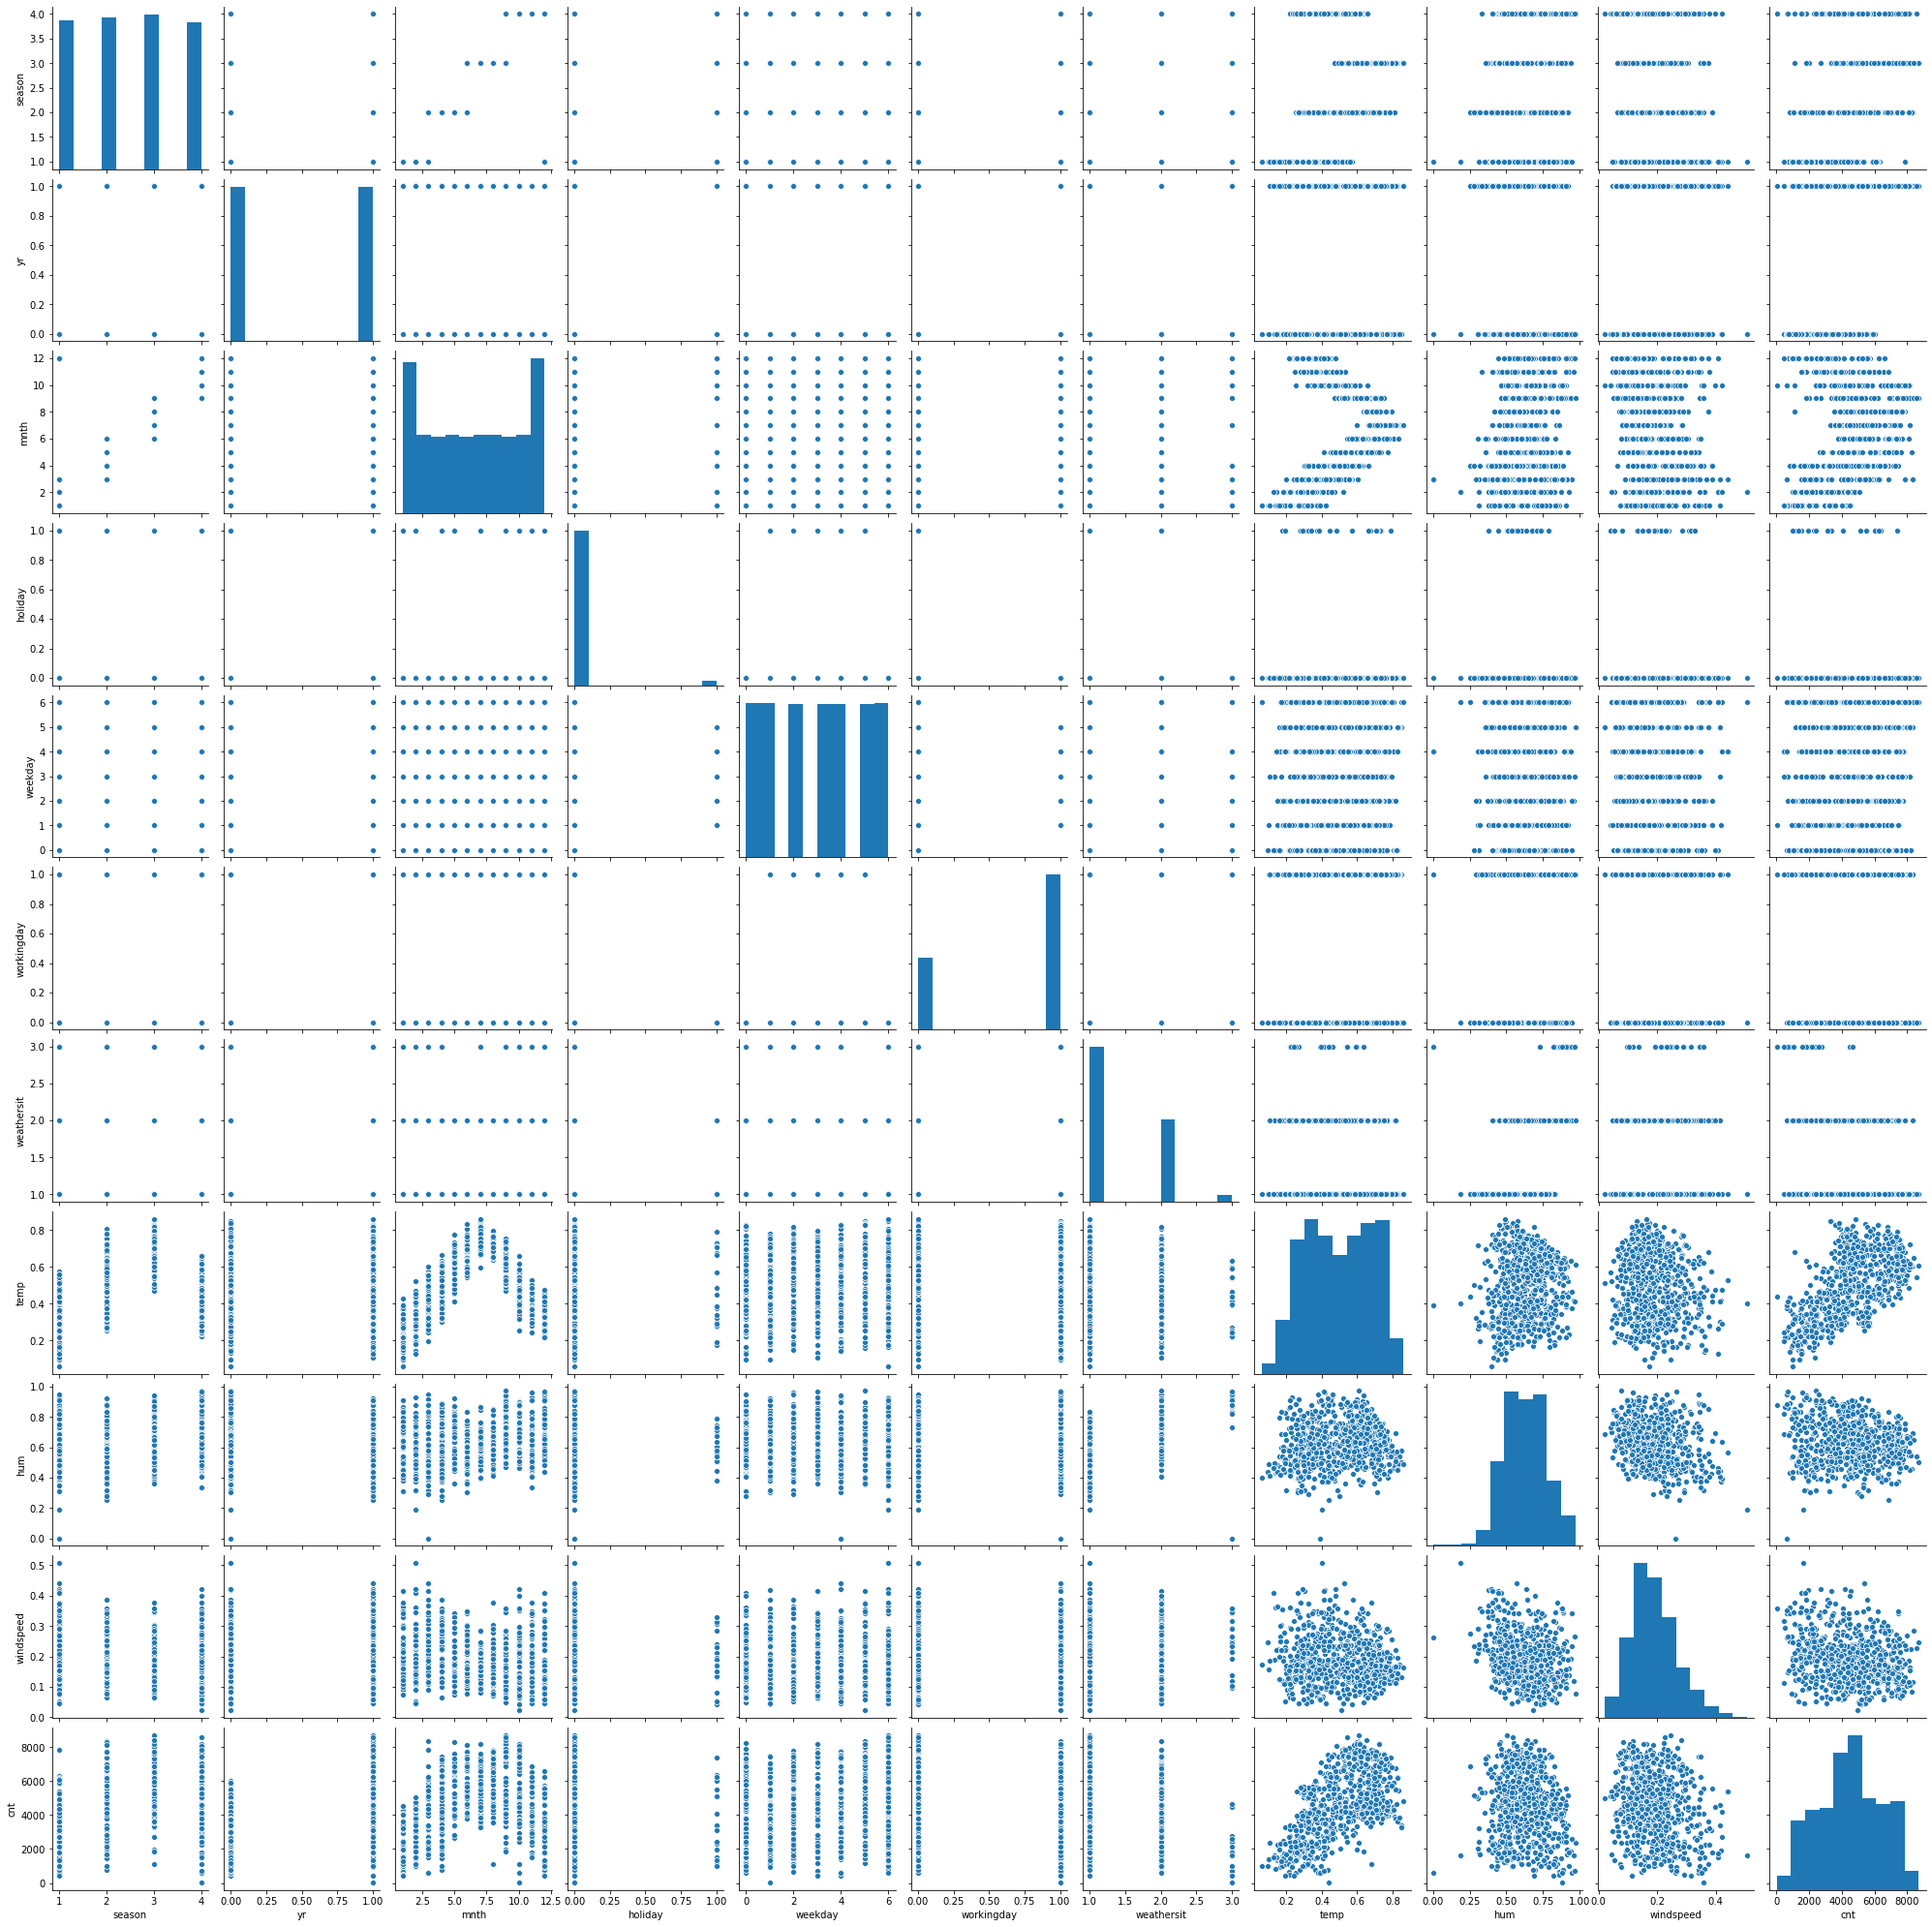

In [39]:
sns.pairplot(bicicletas)

In [40]:
X_numerico = bicicletas[['temp', 'hum', 'windspeed', 'cnt']]

In [41]:
X_numerico

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


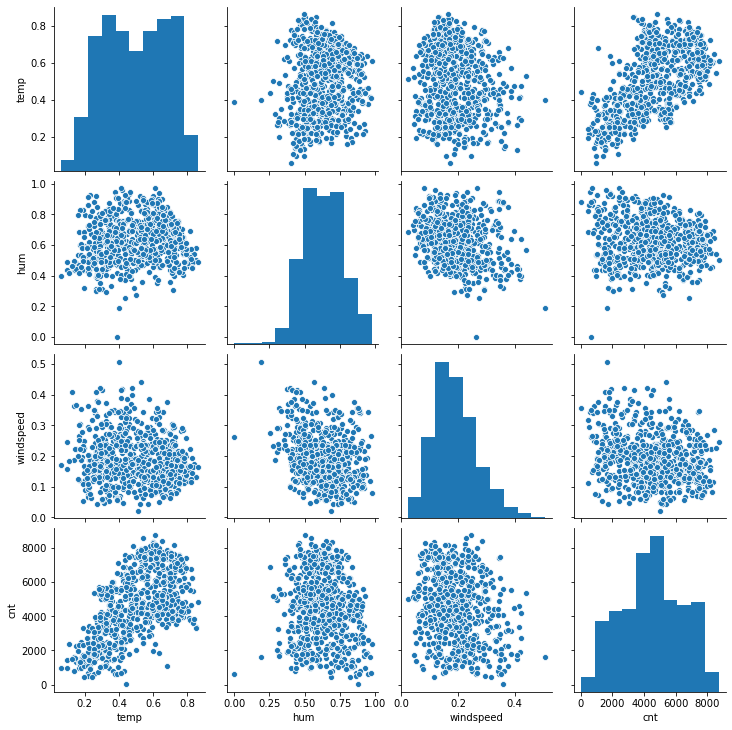

In [42]:
sns.pairplot(X_numerico)

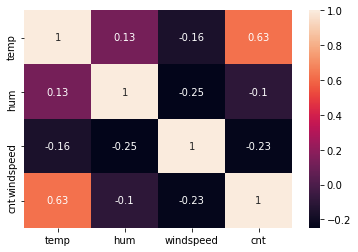

In [44]:
sns.heatmap(X_numerico.corr(), annot=True)

In [45]:
# Dados categóricos season 	yr 	mnth 	holiday 	weekday 	workingday 	weathersit
X_dados_categoricos = bicicletas[['season', 'yr', 'mnth', 
                                  'holiday', 'weekday', 'workingday', 'weathersit']]

In [48]:
X_dados_categoricos

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1
...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2
2012-12-28,1,1,12,0,5,1,2
2012-12-29,1,1,12,0,6,0,2


In [53]:
X_dados_categoricos.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1


In [52]:
X_dados_categoricos.tail(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2012-12-29,1,1,12,0,6,0,2
2012-12-30,1,1,12,0,0,0,1
2012-12-31,1,1,12,0,1,1,2


In [55]:
X_dados_categoricos

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1
...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2
2012-12-28,1,1,12,0,5,1,2
2012-12-29,1,1,12,0,6,0,2


Domingo 0  
Segunda 1

Domingo  0 1 0 
Segunda  1 0 0
Terca    0 0 1

In [57]:
from sklearn.preprocessing import OneHotEncoder
codificadorOneHotEncoder = OneHotEncoder()

X_dados_categoricos = codificadorOneHotEncoder.fit_transform(X_dados_categoricos).toarray()

In [59]:
X_dados_categoricos

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [60]:
# 32 colunas
X_dados_categoricos.shape

(731, 32)

In [61]:
X_dados_categoricos = pd.DataFrame(X_dados_categoricos)

In [62]:
X_dados_categoricos.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [63]:
X_numerico

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


In [64]:
X_numerico = X_numerico.reset_index()

In [65]:
X_numerico

,dteday,temp,hum,windspeed,cnt
0,2011-01-01,0.344167,0.805833,0.160446,985
1,2011-01-02,0.363478,0.696087,0.248539,801
2,2011-01-03,0.196364,0.437273,0.248309,1349
3,2011-01-04,0.200000,0.590435,0.160296,1562
4,2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...
726,2012-12-27,0.254167,0.652917,0.350133,2114
727,2012-12-28,0.253333,0.590000,0.155471,3095
728,2012-12-29,0.253333,0.752917,0.124383,1341
729,2012-12-30,0.255833,0.483333,0.350754,1796


In [66]:
X_todos_valores_entrada = pd.concat([X_dados_categoricos, X_numerico], axis=1)

In [68]:
X_todos_valores_entrada

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2012-12-27,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2012-12-28,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2012-12-29,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2012-12-30,0.255833,0.483333,0.350754,1796


In [69]:
X_todos_valores_entrada = X_todos_valores_entrada.drop(labels=['dteday'], axis=1) 

In [70]:
X_todos_valores_entrada

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.255833,0.483333,0.350754,1796


In [71]:
X = X_todos_valores_entrada.iloc[:, :-1].values

In [73]:
X

array([[1.      , 0.      , 0.      , ..., 0.344167, 0.805833, 0.160446],
       [1.      , 0.      , 0.      , ..., 0.363478, 0.696087, 0.248539],
       [1.      , 0.      , 0.      , ..., 0.196364, 0.437273, 0.248309],
       ...,
       [1.      , 0.      , 0.      , ..., 0.253333, 0.752917, 0.124383],
       [1.      , 0.      , 0.      , ..., 0.255833, 0.483333, 0.350754],
       [1.      , 0.      , 0.      , ..., 0.215833, 0.5775  , 0.154846]])

In [75]:
X.shape

(731, 35)

In [76]:
y = X_todos_valores_entrada.iloc[:, -1:].values

In [78]:
y

array([[ 985],
       [ 801],
       [1349],
       [1562],
       [1600],
       [1606],
       [1510],
       [ 959],
       [ 822],
       [1321],
       [1263],
       [1162],
       [1406],
       [1421],
       [1248],
       [1204],
       [1000],
       [ 683],
       [1650],
       [1927],
       [1543],
       [ 981],
       [ 986],
       [1416],
       [1985],
       [ 506],
       [ 431],
       [1167],
       [1098],
       [1096],
       [1501],
       [1360],
       [1526],
       [1550],
       [1708],
       [1005],
       [1623],
       [1712],
       [1530],
       [1605],
       [1538],
       [1746],
       [1472],
       [1589],
       [1913],
       [1815],
       [2115],
       [2475],
       [2927],
       [1635],
       [1812],
       [1107],
       [1450],
       [1917],
       [1807],
       [1461],
       [1969],
       [2402],
       [1446],
       [1851],
       [2134],
       [1685],
       [1944],
       [2077],
       [ 605],
       [1872],
       [21

In [80]:
y.shape

(731, 1)

In [82]:
y

array([[ 985],
       [ 801],
       [1349],
       [1562],
       [1600],
       [1606],
       [1510],
       [ 959],
       [ 822],
       [1321],
       [1263],
       [1162],
       [1406],
       [1421],
       [1248],
       [1204],
       [1000],
       [ 683],
       [1650],
       [1927],
       [1543],
       [ 981],
       [ 986],
       [1416],
       [1985],
       [ 506],
       [ 431],
       [1167],
       [1098],
       [1096],
       [1501],
       [1360],
       [1526],
       [1550],
       [1708],
       [1005],
       [1623],
       [1712],
       [1530],
       [1605],
       [1538],
       [1746],
       [1472],
       [1589],
       [1913],
       [1815],
       [2115],
       [2475],
       [2927],
       [1635],
       [1812],
       [1107],
       [1450],
       [1917],
       [1807],
       [1461],
       [1969],
       [2402],
       [1446],
       [1851],
       [2134],
       [1685],
       [1944],
       [2077],
       [ 605],
       [1872],
       [21

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [85]:
y

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777],
       [0.14277497],
       [0.13115509],
       [0.15922688],
       [0.1609526 ],
       [0.14104924],
       [0.13598711],
       [0.11251726],
       [0.07604694],
       [0.18729867],
       [0.21916705],
       [0.1749885 ],
       [0.11033134],
       [0.11090658],
       [0.16037736],
       [0.22583985],
       [0.05568339],
       [0.04705476],
       [0.13173033],
       [0.12379199],
       [0.1235619 ],
       [0.17015647],
       [0.15393465],
       [0.17303267],
       [0.17579383],
       [0.19397147],
       [0.1130925 ],
       [0.18419236],
       [0.19443166],
       [0.17349287],
       [0.18212149],
       [0.17441325],
       [0.1983433 ],
       [0.16682006],
       [0.18028072],
       [0.21755637],
       [0.20628164],
       [0.24079613],
       [0.282

In [88]:
# Vamos separar dado de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [90]:
X_train.shape

(584, 35)

In [92]:
X_train

array([[0.      , 1.      , 0.      , ..., 0.649167, 0.467917, 0.175383],
       [0.      , 0.      , 0.      , ..., 0.589167, 0.896667, 0.141787],
       [0.      , 0.      , 1.      , ..., 0.643333, 0.727083, 0.139929],
       ...,
       [1.      , 0.      , 0.      , ..., 0.138333, 0.434167, 0.36195 ],
       [0.      , 0.      , 1.      , ..., 0.7225  , 0.39625 , 0.102608],
       [0.      , 0.      , 0.      , ..., 0.435   , 0.463333, 0.181596]])

In [94]:
X_test.shape

(147, 35)

# Vamos construir o modelo da nossa rede neural usando keras

In [115]:
modelo_bicicletas = tf.keras.Sequential()

# vou adicionar camada de entrada e vou adicionar também camada oculta e 
# definir a função de ativação para a primeira camada oculta
# camada de entrada tem 35 neurônios porque tem 35 entradas usamos input_shape
# vou adicionar 100 neurônios na próxima camada usando o parâmetro units=100
# função de ativação relu é informada pelo parâmetro activation='relu'
modelo_bicicletas.add(tf.keras.layers.Dense(units=100, activation='relu' ,input_shape=(35,)))

#Vamos adicionar a segunda camada oculta com 100 neurônios e todos eles 
# usando função ativação relu
modelo_bicicletas.add(tf.keras.layers.Dense(units=100, activation='relu'))

#Vamos adicionar a terceira camada oculta com 100 neurônios e todos eles 
# usando função ativação relu
modelo_bicicletas.add(tf.keras.layers.Dense(units=100, activation='relu'))

# adicionando 1 neurônio na camada de saída
modelo_bicicletas.add(tf.keras.layers.Dense(units=1, activation='linear'))
# Saída para problemas lineares é importante usar função de ativação linear

In [116]:
modelo_bicicletas.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               3600      
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


In [117]:
modelo_bicicletas.compile(optimizer='Adam', loss='mean_squared_error')

In [105]:
584*0.2

116.80000000000001

In [118]:
# treinar 
# batch_size de 50 vai gerar 584/50=11 lotes para avaliar o erro
historico_treinamento_bicicletas =  modelo_bicicletas.fit(X_train, y_train, epochs=25, batch_size=50, validation_split=0.2)

Epoch 1/25
10/10 [==============================] - 0s 8ms/step - loss: 0.0450 - val_loss: 0.0229
Epoch 2/25
10/10 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.0144
Epoch 3/25
10/10 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.0102
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.0095
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0092
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.0100
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.0095
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - val_loss: 0.0098
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0103
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0103
Epoch 11/25
10/10 [

In [119]:
historico_treinamento_bicicletas.history

{'loss': [0.04504369571805,
  0.016703693196177483,
  0.011377789080142975,
  0.008802623488008976,
  0.007447104435414076,
  0.006400187965482473,
  0.0058221095241606236,
  0.005136145278811455,
  0.0048995367251336575,
  0.0044353920966386795,
  0.004217862151563168,
  0.0039469520561397076,
  0.00369342602789402,
  0.0035443068481981754,
  0.0033637883607298136,
  0.0032082388643175364,
  0.0029177048709243536,
  0.0028090407140552998,
  0.002705636899918318,
  0.0029798310715705156,
  0.0026427083648741245,
  0.0025174394249916077,
  0.0024277481716126204,
  0.0026656356640160084,
  0.0023798251058906317],
 'val_loss': [0.022948917001485825,
  0.014396422542631626,
  0.010162459686398506,
  0.009536880999803543,
  0.009220615029335022,
  0.009959082119166851,
  0.00954957865178585,
  0.009800417348742485,
  0.01031233835965395,
  0.010306107811629772,
  0.010258020833134651,
  0.009892216883599758,
  0.0101652592420578,
  0.010568748228251934,
  0.010722551494836807,
  0.011050914

In [120]:
historico_treinamento_bicicletas.history.keys()

dict_keys(['loss', 'val_loss'])

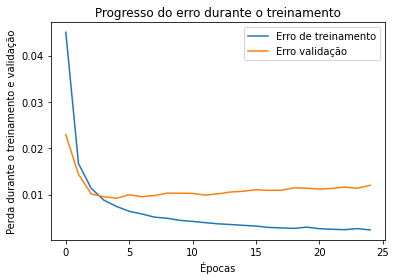

In [123]:
plt.plot(historico_treinamento_bicicletas.history['loss'])
plt.plot(historico_treinamento_bicicletas.history['val_loss'])

plt.title('Progresso do erro durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda durante o treinamento e validação')
plt.legend(['Erro de treinamento', 'Erro validação'])

In [124]:
# Predição
y_predicao = modelo_bicicletas.predict(X_test)

Text(0.5, 0, 'Valores verdadeiros')

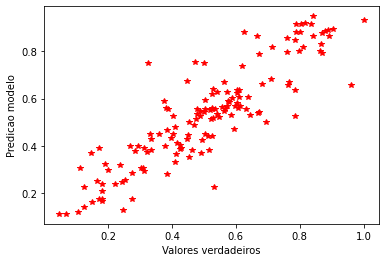

In [129]:
plt.plot(y_test, y_predicao, "*", color='r')
plt.ylabel('Predicao modelo')
plt.xlabel('Valores verdadeiros')

In [131]:
y_predicao_original = scaler.inverse_transform(y_predicao)
y_test_original = scaler.inverse_transform(y_test)

Text(0.5, 0, 'Valores verdadeiros')

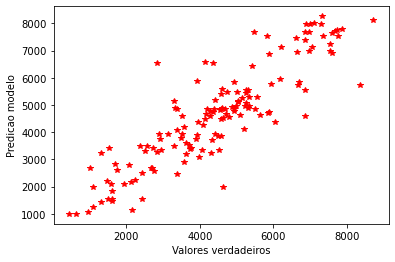

In [132]:
plt.plot(y_test_original, y_predicao_original, "*", color='r')
plt.ylabel('Predicao modelo')
plt.xlabel('Valores verdadeiros')

# Avaliação do modelo

In [134]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [136]:
mae = mean_absolute_error(y_test_original, y_predicao_original)

In [138]:
mse = mean_squared_error(y_test_original, y_predicao_original)

In [140]:
# Coeficiente de determinação
# https://pt.wikipedia.org/wiki/Coeficiente_de_determinação

r2 = r2_score(y_test_original, y_predicao_original)

In [145]:
k = X_test.shape[1]
k

35

In [146]:
n = len(X_test)
n

147

In [147]:
X_test.shape

(147, 35)

In [149]:
k = X_test.shape[1]
n = len(X_test)
# penaliza quando são adicionadas variáveis que não melhoram o modelo
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [151]:
print('MAE:',mae, 'MSE:',mse, 'R2:',r2, 'R2_adj:', adj_r2)

MAE: 665.6689287042942 MSE: 846800.729832437 R2: 0.7591031929986805 R2_adj: 0.6831447403406068
